In [1]:
import os
import sys

root_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
model_dir = os.path.join(root_dir, "model")
sys.path.append(root_dir)
sys.path.append(model_dir)

import time
import json
import numpy as np
import pandas as pd

import hoho_utils

In [2]:
#test
hoho_utils.INDEXS_2_PIECES

'KARBNPCkarbnpc'

In [10]:
data_dir = "../output/data"
file_list = os.listdir(data_dir)
file_count = len(file_list)
item_list = list()

print(f"file_count: {file_count}")

for i, filename in enumerate(file_list):
    file_path = os.path.join(data_dir, filename)
    with open(file_path, "r") as file:
        json_str = file.read()
        matches = json.loads(json_str)
        match_count = len(matches)
        
        for j, match in enumerate(matches):
            print(f"match: {match}")
#             break
            
            base_id =  int(time.time() * 1000)
            for k, round in enumerate(match):
                match_id = f"{i}-{j}"
                round_id = f"{base_id + k}"
                state = round[0]
                action = round[2]
                next_state = round[3]
                chapture_list = round[6]
                chaptures = ','.join(chapture_list)
                chapture_reward = round[7]
                
                win = 0
                done = round[5]
                if "K" in chapture_list:
                    win = -1
                    done = True
                elif "k" in chapture_list:
                    win = 1
                    done = True
                    
                round_dict = {"match_id": match_id,
                              "round_id": round_id,
                              "state": state,
                              "action":action,
                              "next_state": next_state,
                              "done": done,
                              "chaptures": chaptures,
                              "chapture_reward": chapture_reward,
                              "win": win}
                item_list.append(round_dict)
                
                if win == 1 or win == -1:
                    break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



match: [['RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04040404040404041, 0.010101010101010102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [28]:
data = pd.DataFrame(item_list)

In [29]:
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,False,,0.00,0
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,False,,0.00,0
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,False,,0.00,0
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,False,,0.00,0


In [30]:
data.dtypes

match_id            object
round_id            object
state               object
action              object
next_state          object
done                  bool
chaptures           object
chapture_reward    float64
win                  int64
dtype: object

In [31]:
data["win"].map(lambda x: 1 if x != 0 else 0)

0       0
1       1
2       0
3       1
4       0
       ..
2528    0
2529    0
2530    0
2531    0
2532    1
Name: win, Length: 2533, dtype: int64

In [32]:
data["converted"] = data["win"].apply(lambda x: 1 if x != 0 else 0)

In [33]:
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,False,,0.00,0,0
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,False,,0.00,0,0
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,False,,0.00,0,0
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,False,,0.00,0,0


In [34]:
data.to_excel("./hoho_chess_data.xlsx", index = False)

### 对棋盘状态进行embedding

In [3]:
from sentence_transformers import SentenceTransformer, util

In [4]:
# model = SentenceTransformer("sentence-transformers/multi-qa-mpnet-base-dot-v1")
model_path = r"D:\temp\embeddings\multi-qa-mpnet-base-dot-v1"
model = SentenceTransformer(model_path)

In [5]:
#test
s = "RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s_emb = model.encode(s)
s_emb.shape

(768,)

In [6]:
#test
s2 = "RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s2_emb = model.encode(s2)
util.pytorch_cos_sim(s_emb, s2_emb)

tensor([[0.9906]])

In [2]:
file_path = "./hoho_chess_data.xlsx"
data = pd.read_excel(file_path)
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,False,NaN,0.00,0,0
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,False,NaN,0.00,0,0
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,False,NaN,0.00,0,0
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,False,NaN,0.00,0,0


In [3]:
data["match_id"] = data["match_id"].astype(str)
data["round_id"] = data["round_id"].astype(str)

In [4]:
data["done"] = data["done"].apply(lambda x: 1 if x == True else 0)
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,NaN,0.00,0,0


In [5]:
data["jid"] = data["match_id"] + "_" + data["round_id"]
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0_16922826810
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0_16922826811
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1_16922826810
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1_16922826811
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2_16922826810
...,...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,584_16922826824
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826825
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826826
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,NaN,0.00,0,0,584_16922826827


In [6]:
data[data["jid"].duplicated()] # 怎么jid就重复了？

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
214,48,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,48_16922826810
215,48,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,48_16922826811
216,49,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,49_16922826810
217,49,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,49_16922826811
218,50,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,50_16922826810
...,...,...,...,...,...,...,...,...,...,...,...
2376,540,16922826821,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,540_16922826821
2431,552,16922826820,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,552_16922826820
2432,552,16922826821,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,552_16922826821
2433,553,16922826820,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,553_16922826820


In [7]:
# 正式环境不用，这是只是临时修正数据
current_mid = None
mid_list_new = []
row = 0
i = 0
cls_id = 0
done = False
while row < len(data):
    row_data = data.iloc[row]
    check_mid = row_data["match_id"]
    print(f"check_mid: {check_mid}")
    
    count = 0
    i = row
    while (check_mid == current_mid or current_mid is None):
        mid_list_new.append(f"{cls_id}-{count}")
        print(f"  current_mid: {current_mid}")
        count = count + 1
        
        i = i + 1
        if i >= len(data):
            done = True
            break
        
        current_mid = data.iloc[i]["match_id"]
        
    
    if done:
        break
        
    cls_id = cls_id + 1
    row = row + count
    current_mid = None
        

check_mid: 0
  current_mid: None
  current_mid: 0
check_mid: 1
  current_mid: None
  current_mid: 1
check_mid: 2
  current_mid: None
  current_mid: 2
check_mid: 3
  current_mid: None
  current_mid: 3
check_mid: 4
  current_mid: None
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
  current_mid: 4
check_mid: 5
  current_mid: None
  current_mid: 5
check_mid: 6
  current_mid: None
  current_mid: 6
check_mid: 7
  current_mid: None
  current_mid: 7
check_mid: 8
  current_mid: None
  current_mid: 8
check_mid: 9
  current_mid: None
  current_mid: 9
check_mid: 10
  current_mid: None
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
  current_mid: 10
check_mid: 11
  current_mid: None
  current_mid: 11
check_mid: 12
  current_mid: None
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current_mid: 12
  current

In [8]:
# 正式环境不用，这是只是临时修正数据
len(mid_list_new)

2533

In [9]:
# 正式环境不用，这是只是临时修正数据
data["mid_new"] = mid_list_new
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,mid_new
0,0,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0_16922826810,0-0
1,0,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0_16922826811,0-1
2,1,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1_16922826810,1-0
3,1,16922826811,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1_16922826811,1-1
4,2,16922826810,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2_16922826810,2-0
...,...,...,...,...,...,...,...,...,...,...,...,...
2528,584,16922826824,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,584_16922826824,726-4
2529,584,16922826825,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826825,726-5
2530,584,16922826826,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,584_16922826826,726-6
2531,584,16922826827,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,NaN,0.00,0,0,584_16922826827,726-7


In [10]:
# 正式环境不用，这是只是临时修正数据
data["jid_new"] = data["mid_new"] + "_" + data["round_id"]

In [11]:
# 正式环境不用，这是只是临时修正数据
data[data["jid_new"].duplicated()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,mid_new,jid_new


In [12]:
data.to_excel(f"./hoho_chess_temp.xlsx", index = False)

In [7]:
# 正式环境不用，这是只是临时修正数据
data = pd.read_excel(f"./hoho_chess_temp.xlsx")
data1 = data.drop(["match_id", "round_id", "jid"], axis = 1, inplace = False)

In [8]:
data1.dtypes

state               object
action              object
next_state          object
done                 int64
chaptures           object
chapture_reward    float64
win                  int64
converted            int64
mid_new             object
jid_new             object
dtype: object

In [9]:
data1

,state,action,next_state,done,chaptures,chapture_reward,win,converted,mid_new,jid_new
0,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0,0-0_16922826810
1,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1,0-1_16922826811
2,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1-0,1-0_16922826810
3,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1-1,1-1_16922826811
4,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2-0,2-0_16922826810
...,...,...,...,...,...,...,...,...,...,...
2528,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,726-4,726-4_16922826824
2529,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,726-5,726-5_16922826825
2530,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.00,0,0,726-6,726-6_16922826826
2531,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,NaN,0.00,0,0,726-7,726-7_16922826827


In [10]:
# 正式环境不用，这是只是临时修正数据
data1.groupby("jid_new")["mid_new"].count().reset_index(name = "count")

,jid_new,count
0,0-0_16922826810,1
1,0-1_16922826811,1
2,1-0_16922826810,1
3,1-1_16922826811,1
4,10-0_16922826810,1
...,...,...
2528,98-6_16922826816,1
2529,98-7_16922826817,1
2530,98-8_16922826818,1
2531,99-0_16922826810,1


In [11]:
data1[data1["chaptures"].isnull()]

,state,action,next_state,done,chaptures,chapture_reward,win,converted,mid_new,jid_new
9,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,0,NaN,0.0,0,0,4-1,4-1_16922826811
10,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/6nc...,e3e4,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/6nc...,0,NaN,0.0,0,0,4-2,4-2_16922826812
11,1cBAKABNR/R8/7C1/P1P3P1P/1C2P4/9/p1p1p1p1p/2n3...,h2h4,1cBAKABNR/R8/9/P1P3P1P/1C2P2C1/9/p1p1p1p1p/2n3...,0,NaN,0.0,0,0,4-3,4-3_16922826813
13,1cBAKABNR/R8/9/P1P3P1P/4P2C1/9/prp1p1p1p/2n3nc...,h4f4,1cBAKABNR/R8/9/P1P3P1P/4PC3/9/prp1p1p1p/2n3nc1...,0,NaN,0.0,0,0,4-5,4-5_16922826815
14,1cBAKABNR/R8/9/P1P3P1P/4PC3/9/prp1p1p1p/2n3nc1...,i3i4,1cBAKABNR/R8/9/P1P3P2/4PC2P/9/prp1p1p1p/2n3nc1...,0,NaN,0.0,0,0,4-6,4-6_16922826816
...,...,...,...,...,...,...,...,...,...,...
2516,1cBA1ABNR/5K3/RC5r1/P1P1c1P1P/9/9/p1p1p1p1p/6n...,b2b4,1cBA1ABNR/5K3/R6r1/P1P1c1P1P/1C7/9/p1p1p1p1p/6...,0,NaN,0.0,0,0,722-6,722-6_16922826826
2528,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,NaN,0.0,0,0,726-4,726-4_16922826824
2529,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,NaN,0.0,0,0,726-5,726-5_16922826825
2530,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,NaN,0.0,0,0,726-6,726-6_16922826826


In [12]:
data2 = data1.fillna("", inplace = False)

In [13]:
data2[data2["chaptures"].isnull()]

,state,action,next_state,done,chaptures,chapture_reward,win,converted,mid_new,jid_new


In [14]:
data2["match_id"] = data2["mid_new"].apply(lambda x: x.split("-")[0])
data2

,state,action,next_state,done,chaptures,chapture_reward,win,converted,mid_new,jid_new,match_id
0,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0,0-0_16922826810,0
1,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1,0-1_16922826811,0
2,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1-0,1-0_16922826810,1
3,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1-1,1-1_16922826811,1
4,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2-0,2-0_16922826810,2
...,...,...,...,...,...,...,...,...,...,...,...
2528,RNBc2B2/5K3/2C6/P1P1P1P1P/1C7/9/p1p1p1p1p/1c7/...,b4d4,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c7/...,0,,0.00,0,0,726-4,726-4_16922826824,726
2529,RNBc2B2/5K3/2C6/P1P1P1P1P/3C5/9/p1p1p1p1p/1c4n...,d4f4,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,0,,0.00,0,0,726-5,726-5_16922826825,726
2530,RNBc2B2/5K3/2C6/P1P1P1P1P/5C3/9/p1p1p1p1p/1c4n...,f4f5,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5C3/p1p1p1p1p/1c4n...,0,,0.00,0,0,726-6,726-6_16922826826,726
2531,RNBc2B2/5K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n2...,a0a1,1NBc2B2/R4K3/2C6/P1P1P1P1P/9/5Cp2/p1p1p3p/1c4n...,0,,0.00,0,0,726-7,726-7_16922826827,726


In [15]:
data_matchid_group = data2.groupby("match_id")["jid_new"].count().reset_index(name = "count")
data_matchid_group.describe()

,count
count,727.000000
mean,3.484182
std,3.758474
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,23.000000


In [16]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

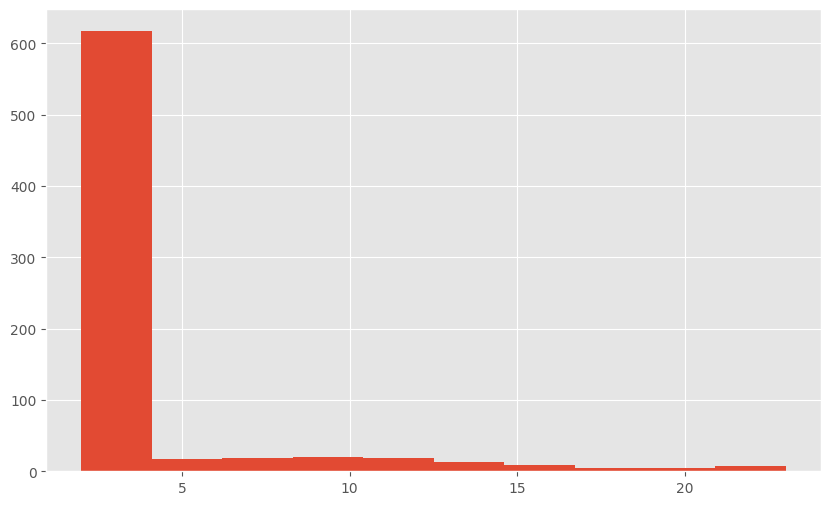

In [17]:
plt.figure(figsize = (10, 6))
plt.hist(data_matchid_group["count"].values)
plt.show()

In [18]:
data_matchid_group["count"].values

array([ 2,  2,  8,  2,  2,  2,  2,  2,  2,  4,  2,  4,  2,  2,  8,  2,  2,
        2,  2,  2,  2,  2,  2,  2, 11, 11,  2,  2,  6,  2,  2,  2,  7,  2,
        2, 16,  2,  2,  2, 17,  2,  2, 17,  2,  2,  2,  6,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  4,  2,  4,  2,  2,  2,  4,  2,  2,
       10,  8, 16,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  8,  2,  2,  2,  2,  2,  2,  2, 14,  2,  2,
        2,  2,  2,  2,  2, 12,  2,  2,  2,  2,  2, 15, 20,  2, 11,  6,  2,
        3,  2,  7,  2,  2,  2,  7, 10,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        4, 21,  2,  2,  2,  2,  2,  2,  2,  2,  9,  2,  2,  2,  2, 10,  2,
        2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2, 19,  2,  2,  2,  2,  2,
        2,  2,  7,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  4,  2,
        2,  2,  5,  2,  2,  2,  2,  2,  2,  2,  2,  9,  6, 12,  2,  2,  2,
       11,  2, 20,  2,  4,  2,  2,  2,  2,  2,  9,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [27]:
def encode_pieces_one_hot(pieces):
    result = np.zeros(len(hoho_utils.INDEXS_2_PIECES))
    for p in pieces:
        try:
            index = hoho_utils.PIECES_2_INDEX[p]
            result[index] = 1
        except KeyError as e:
            pass
#             print(f"error: 找不到key! {e}")
        
    return result


# test
# encode_pieces_one_hot(["N",'K'])
encode_pieces_one_hot([""])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
def encode_board_state(board_state, model):
    return model.encode(board_state)


# test
encode_board_state(s, model)

array([-8.08912888e-03, -3.75740707e-01, -3.93722653e-01,  3.54994871e-02,
       -9.69871879e-02, -1.52960300e-01,  1.33453041e-01,  3.19958240e-01,
       -6.09019250e-02,  1.48095682e-01,  4.13841382e-02,  2.15795070e-01,
        1.60120428e-01,  1.26348007e-02, -2.20049955e-02, -2.27972493e-02,
       -1.01007521e-02,  2.58477509e-01,  6.86712191e-02, -1.43872529e-01,
       -2.28361011e-01,  3.13995928e-01, -8.89793783e-03,  8.84526223e-03,
       -3.00551914e-02,  1.23455763e-01,  1.79964259e-01,  8.72976705e-02,
       -1.92378595e-01,  3.27121913e-02,  5.30828722e-03,  1.61565050e-01,
       -3.71093571e-01,  1.01709239e-01, -9.45823413e-05, -1.11263320e-01,
        9.73071158e-02, -2.70265900e-02, -2.76365817e-01,  3.01052630e-01,
       -1.26016796e-01,  1.34678140e-01, -3.35976928e-01, -2.35981077e-01,
       -1.71673685e-01,  1.04347747e-02,  1.20770924e-01,  1.35089144e-01,
        3.35098803e-01, -7.61078671e-04,  4.42475677e-01, -4.28185239e-02,
       -2.63673551e-02, -

In [28]:
def encode_action_one_hot(all_actions, action = None):
    result= np.zeros(len(all_actions))
    try:
        index = all_actions.index(action)
        result[index] = 1

    except ValueError as e:
        pass
#         print(f"error: 找不到action:{e}")
        
    return result
        

# test
all_actions = hoho_utils.get_all_actions()
encode_action_one_hot(all_actions, "b4d4")
# encode_action_one_hot(all_actions, "")

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
def state_encoding(s):
    return encode_board_state(s, model)

def action_encoding(a):
    return encode_action_one_hot(all_actions, a)

def chapturs_encoding(c):
    c_list = c.split(",")
    return encode_pieces_one_hot(c_list)

In [23]:
def features_for_logistic_regression(df):    
    n, m = df.shape

    states = df["state"].apply(state_encoding).values.tolist()
    actions = df["action"].apply(action_encoding).values.tolist()
    chaptures = df["chaptures"].apply(chapturs_encoding).values.tolist()
    c_rewards = df["chapture_reward"].values.reshape((n, -1))
    wins = df["win"].values.reshape((n, -1))
    dones = df["done"].values.reshape((n, -1))
    
    return np.hstack([states, actions, chaptures, c_rewards, wins, dones]), df["converted"].values


# test
X_demo,y_demo = features_for_logistic_regression(data2.sample(5))
X_demo.shape, y_demo.shape

error: 找不到key! ''
error: 找不到key! ''


((5, 2871), (5,))

In [24]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 6666

In [19]:
X, y = features_for_logistic_regression(data2)

error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到key! ''
error: 找不到

In [161]:
X.shape, y.shape

((2533, 2871), (2533,))

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = RANDOM_SEED)

In [167]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_val, y_val)
print(score)

1.0


In [170]:
# 输出模型权重（系数）
coefficients = logisticRegr.coef_
intercept = logisticRegr.intercept_

print("Coefficients:", coefficients[0])
print("Intercept:", intercept)

Coefficients: [ 0.01840535  0.01558774 -0.00520291 ...  0.02558798 -3.16829624
  3.16829624]
Intercept: [-5.92425112]


In [35]:
# demo
import pandas as pd
import numpy as np

# 创建一个示例的DataFrame，假设你已经有了这个数据
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'feature2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
    'match': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
}

df = pd.DataFrame(data)
df


,feature1,feature2,match
0,1,0.1,A
1,2,0.2,A
2,3,0.3,A
3,4,0.4,A
4,5,0.5,A
5,6,0.6,B
6,7,0.7,B
7,8,0.8,B
8,9,0.9,B
9,10,1.0,B


In [52]:
# 根据'match'列的值进行分组
grouped = df.groupby('match')

# 定义一个函数来处理每个分组
def process_group(group):
    # 获取分组中的样本数量
    group_size = len(group)
    
    # 如果样本数量超过15个，裁剪多余的样本
    if group_size > 6:
#         group = group.sample(n=15, random_state=42)
        group = group.head(6)
    
    # 如果样本数量不足15个，使用0填充剩余的部分
    elif group_size < 6:
        num_to_add = 6 - group_size
        to_add = pd.DataFrame({'feature1': [0] * num_to_add, 'feature2': [0.0] * num_to_add, 'match': [group['match'].iloc[0]] * num_to_add})
        group = pd.concat([group, to_add], ignore_index=True)
    
    return group

# 对每个分组应用处理函数，并重新组合回一个新的DataFrame
processed_groups = grouped.apply(process_group)

# 重新排序并重置索引
processed_data = processed_groups.reset_index(drop=True)

processed_data

,feature1,feature2,match
0,1,0.1,A
1,2,0.2,A
2,3,0.3,A
3,4,0.4,A
4,5,0.5,A
5,0,0.0,A
6,6,0.6,B
7,7,0.7,B
8,8,0.8,B
9,9,0.9,B


In [55]:
def features_for_lstm(df, max_step = 15):  
    
    # 定义一个函数来处理每个分组
    def process_group(group, max_group_size, num_features):
        # 获取分组中的样本数量
        group_size = len(group)
        
        print(group_size, max_group_size, num_features)

        # 如果样本数量超过max_group_size个，裁剪多余的样本
        if group_size > max_group_size:
            group = group.head(max_group_size)

        # 如果样本数量不足max_group_size个，使用0填充剩余的部分
        elif group_size < max_group_size:
            num_to_add = max_group_size - group_size
            added_features = np.zeros((num_to_add, num_features)).tolist()
            to_add = pd.DataFrame({'features': added_features, 'match_id': [group['match_id'].iloc[0]] * num_to_add})
            group = pd.concat([group, to_add], ignore_index = True)

        return group
    
    n, m = df.shape
    
    df_ext = df.copy()

    states = df["state"].apply(state_encoding).values.tolist()
    actions = df["action"].apply(action_encoding).values.tolist()
    chaptures = df["chaptures"].apply(chapturs_encoding).values.tolist()
    c_rewards = df["chapture_reward"].values.reshape((n, -1))
    wins = df["win"].values.reshape((n, -1))
    dones = df["done"].values.reshape((n, -1))
    
    # hoho_todo: 根据round_id升序排序
    
    features = np.hstack([states, actions, chaptures, c_rewards, wins, dones])
    _, f_m = features.shape
    print(features.shape)
    print(features)
    
    df_ext["features"] = features.tolist()

    
    group = df_ext.groupby("match_id")
    group.apply(lambda group: process_group(group, max_step, f_m))
    
    return df
    
    
    
#     return np.hstack([states, actions, chaptures, c_rewards, wins, dones]), df["converted"].values


# test
features_for_lstm(data2.head(50))

(50, 2871)
[[-8.08912888e-03 -3.75740707e-01 -3.93722653e-01 ... -6.28000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.07738115e-02 -4.11760002e-01 -3.89734268e-01 ... -4.92000000e+00
  -1.00000000e+00  1.00000000e+00]
 [-8.08912888e-03 -3.75740707e-01 -3.93722653e-01 ... -6.28000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.91183996e-03 -5.46172917e-01 -3.83994550e-01 ... -4.92000000e+00
  -1.00000000e+00  1.00000000e+00]
 [-8.08912888e-03 -3.75740707e-01 -3.93722653e-01 ... -6.28000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.41647400e-02 -4.73136187e-01 -3.92527282e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
2 15 2871
2 15 2871
8 15 2871
2 15 2871
11 15 2871
2 15 2871
2 15 2871
2 15 2871
9 15 2871
2 15 2871
2 15 2871
2 15 2871
2 15 2871
2 15 2871


,state,action,next_state,done,chaptures,chapture_reward,win,converted,mid_new,jid_new,match_id
0,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0,0-0_16922826810,0
1,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1,0-1_16922826811,0
2,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,1-0,1-0_16922826810,1
3,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,1-1,1-1_16922826811,1
4,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,2-0,2-0_16922826810,2
5,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,2-1,2-1_16922826811,2
6,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,3-0,3-0_16922826810,3
7,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,3-1,3-1_16922826811,3
8,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,a0a1,1NBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5...,0,N,-6.28,0,0,4-0,4-0_16922826810,4
9,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,0,,0.00,0,0,4-1,4-1_16922826811,4


In [43]:
features = np.array([[1, 2, 3, 4, 4], [6, 7, 8, 9, 10]])
df1 = df.sample(2)
df1["features"] = features.tolist()

In [45]:
df1

,feature1,feature2,match,features
5,6,0.6,B,"[1, 2, 3, 4, 4]"
16,17,1.7,C,"[6, 7, 8, 9, 10]"


In [57]:
[0, 0, 0] * 10

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]